<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Iván Andrés Arellano Ruelas, Frida María Hernández López.

**Fecha:** 27 de noviembre del 2021.

**Expediente:** 714383, 720476.
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github:** https://github.com/FridaHernandezL/Tarea10_HFrida_AIvan

# Tarea 10: Clase 24

Realizar la valuación de las opciones barrera para las acciones de Microsoft, siguiendo los siguientes lineamientos:
1. Realizar la valuación para el tipo de opción barrera 'CALL'- down-and-out, usando la suposición de rendimientos normales y usando el método del histograma. Para ambas valuaciones, comparar los resultados de la evaluación obtenida con los resultados obtenidos por la valuación Europea. Como se realizó en clase.
2. Repetir el inciso anterior pero en esta ocasión para el caso de 'PUT'- Up-and-out.

**Nota:** Analice los datos descargados y según el método ya sea `down-and-out` o `Up-and-out` defina un strike price usando la volatility smile vista en la clase de opciones europeas y basado en el spot price y el strike defina una barrera adecuada.

Se habilitará un enlace en canvas para subir un cuaderno de python, con la solución.

**Criterio de revisión.**

> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

#### Código de solución `ESTUDIANTE 1: FRIDA HERNÁNDEZ`

In [27]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from sklearn.neighbors import KernelDensity
import datetime
from datetime import datetime, timedelta
import scipy.stats as st
import scipy as sp # Histograma de rendimientos  sp
import scipy.optimize as optimize
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
%matplotlib inline

In [28]:
# Funciones a utilizar:
    #Calculation of log-returns
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).dropna()

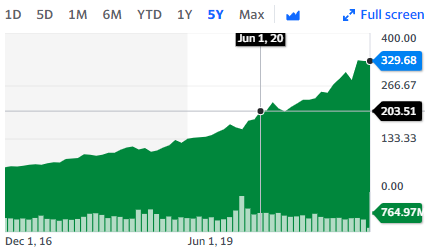

<center>Precios de Microsoft</center>

In [29]:
#Descargue los precios desde 2017 al presente de Microsoft
data = pd.read_csv('MSFT.csv')
data=data.set_index('Date')
closes=pd.DataFrame(data)
closes.tail()

,Adj Close
Date,
18/11/2021,341.269989
19/11/2021,343.109985
22/11/2021,339.829987
23/11/2021,337.679993
24/11/2021,337.910004


### Histograma de Rendimientos

In [30]:
#Rendimientos
ret_MSFT = calc_daily_ret(closes.iloc[:,0])
#media
mu = ret_MSFT.mean()
#Desviacion estandar
sigma = ret_MSFT.std()
#Daily Treasury Yield Curve Rates al 24-nov
r = 0.0024/360 
mu, sigma, r

(0.001426717918449227, 0.01732629814041869, 6.666666666666666e-06)

In [31]:
# Centro mis datos en mi tasa libre de riesgo
freq, values = np.histogram(ret_MSFT-mu+r, bins=10000)
# freq = freq.astype('float32')
prob = freq/np.sum(freq)

#### 1. Opción barrera 'CALL'- down-and-out

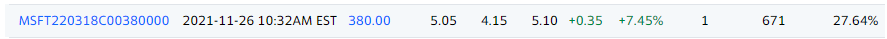

In [32]:
# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = '2022-03-18'

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start=today, end=expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K = 380
S0 = closes.iloc[-1,0]

ret = np.random.choice(values[1:], (ndays,nscen), p=prob)
sim_ret_hist = pd.DataFrame(ret, index=dates)
sim_closes_hist = S0*np.exp(sim_ret_hist.cumsum())
sim_closes_hist.iloc[0,:]=S0

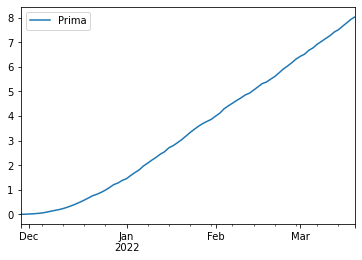

In [35]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
call_hist = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(sim_closes_hist-strike,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
call_hist.plot();

In [36]:
prima=call_hist.iloc[-1,0]
prima

8.042638664617861

In [37]:
# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = expiry

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start = today, end = expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K=K
S0 = closes.iloc[-1,0]

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes.iloc[0,:] = S0
sim_closes

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2021-11-29,337.910004,337.910004,337.910004,337.910004,337.910004,337.910004,337.910004,337.910004,337.910004,337.910004,...,337.910004,337.910004,337.910004,337.910004,337.910004,337.910004,337.910004,337.910004,337.910004,337.910004
2021-11-30,338.770680,338.116013,335.183602,341.484270,328.479346,334.222928,325.876753,349.206208,340.145959,337.560298,...,352.720668,333.787224,331.281300,325.537592,337.170418,341.064450,340.894763,329.650197,347.873590,327.995316
2021-12-01,332.158783,339.966226,345.295055,337.775921,336.746990,338.144189,335.577275,356.103612,340.829643,331.842495,...,358.876786,329.101055,337.715605,326.127526,343.108626,340.200344,335.833535,336.106722,347.641212,327.278633
2021-12-02,329.073372,343.558507,351.459577,339.209885,331.639935,334.173199,329.792268,363.408895,344.755934,324.100403,...,352.224541,328.226489,343.174195,326.059507,341.047529,338.960756,329.067630,336.430610,347.894771,321.025899
2021-12-03,323.164488,346.403996,356.230746,338.248494,331.207012,322.175361,325.686148,370.193926,354.336907,317.317284,...,342.222395,332.076076,335.752346,328.607366,339.311821,347.707875,329.750402,340.623443,351.155511,322.454044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-14,290.006481,364.209333,409.317978,419.207972,345.221935,421.517349,377.235826,368.836841,274.347645,354.236424,...,426.222148,291.422750,372.898276,298.729411,340.127211,318.912245,283.584794,363.480027,403.956929,347.412945
2022-03-15,291.887820,370.413103,411.711840,419.169662,343.293891,427.292581,373.288881,373.409666,282.256719,346.655899,...,429.791463,289.642179,373.135597,291.186017,339.170490,324.554581,287.066147,364.354300,401.949060,354.440513
2022-03-16,289.538107,371.168732,405.684858,430.524354,343.149697,414.484367,377.093115,375.090846,282.594410,352.440132,...,417.487554,294.434881,375.939400,288.658311,333.954717,335.934769,285.729165,370.152411,392.618331,355.455812
2022-03-17,292.038372,367.331638,397.143098,435.161063,329.515668,405.764450,377.015404,377.025992,281.238901,351.177948,...,426.090453,292.405144,369.179778,293.508560,340.755804,335.361839,287.290636,376.271608,395.679383,351.188751


In [38]:
K,S0

(380, 337.910004)

In [46]:
# Precio barrera
B = 334

# Función de activación (knock-in)
# Si en algún momento el precio toca la barrera la opción se desactiva
I = (sim_closes > B).cumprod(axis=0)  > 0
I

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2021-11-29,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2021-11-30,True,True,True,True,False,True,False,True,True,True,...,True,False,False,False,True,True,True,False,True,False
2021-12-01,False,True,True,True,False,True,False,True,True,False,...,True,False,False,False,True,True,True,False,True,False
2021-12-02,False,True,True,True,False,True,False,True,True,False,...,True,False,False,False,True,True,False,False,True,False
2021-12-03,False,True,True,True,False,False,False,True,True,False,...,True,False,False,False,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-14,False,True,True,True,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
2022-03-15,False,True,True,True,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
2022-03-16,False,True,True,True,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
2022-03-17,False,True,True,True,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False


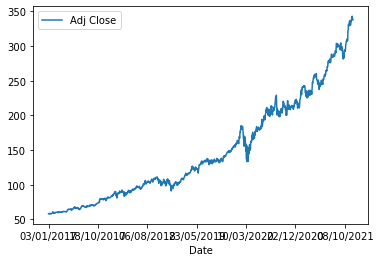

In [47]:
closes.plot()

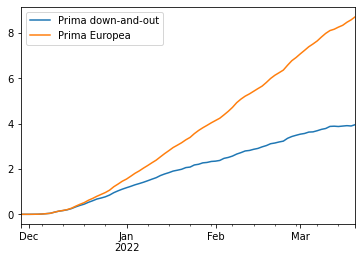

In [48]:
# Definir barrera
B = B
# Crear función indicadora
I = (sim_closes > B).cumprod(axis=0)  > 0
# Definir strike
strike = K
# Calcular la prima de una opción Europea
call = pd.DataFrame({'Prima Europea':np.exp(-r*ndays)*np.fmax(sim_closes - strike, 0)
                     .mean(axis=1)},index=dates)
# Calcular la prima de una opción barrera
callba = pd.DataFrame({'Prima down-and-out':np.exp(-r*ndays)*(I * np.fmax(sim_closes - strike, 0))
                       .mean(axis=1)},index=dates)
# Graficar el resultado de las dos primas previamente valuadas
ax = callba.plot();
call.plot(ax=ax);

In [49]:
call.iloc[-1], callba.iloc[-1]

(Prima Europea    8.71996
 Name: 2022-03-18 00:00:00, dtype: float64,
 Prima down-and-out    3.957166
 Name: 2022-03-18 00:00:00, dtype: float64)

#### Conclusiones
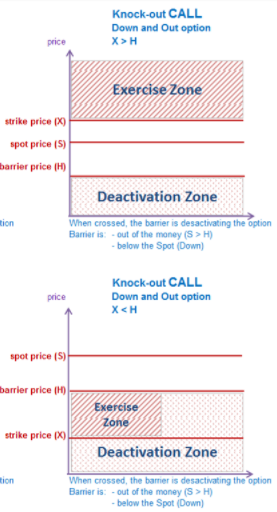
Como se está trabajando con una opción barrera 'CALL'- down-and-out se tienen las anteriores opciones para la valuación de una opción Barrera, debido a que se escogió una opcion con un spot price menor al strike price, se toma:

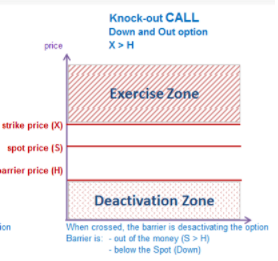
Por lo tanto el precio de la barrera debe ser menor al spot price que se tiene: 337.91, se tomó un valor de 334 ya que personalmente me considero aversa al riesgo, si tengo un call que esta 'apostando' por qué el precio de Microsoft suba, y este baja, quiero que la desactivación ocurra algo 'inmediato' si es que mi predicción se equivoca y este comienza a bajar, para evitar una mayor pérdida de dinero.

Esta estrategia comparada con una opcion Europea es mas barata, por lo tanto es buena.

#### 2. Opción barrera 'PUT'- up-and-out

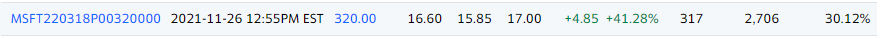

In [50]:
# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = '2022-03-18'

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start=today, end=expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K = 320
S0 = closes.iloc[-1,0]

ret = np.random.choice(values[1:], (ndays,nscen), p=prob)
sim_ret_hist = pd.DataFrame(ret, index=dates)
sim_closes_hist = S0*np.exp(sim_ret_hist.cumsum())
sim_closes_hist.iloc[0,:]=S0

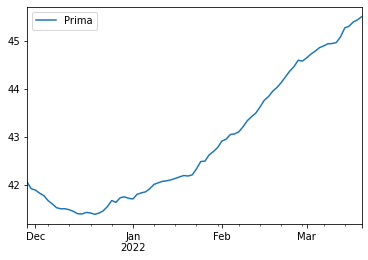

In [51]:
put_hist=pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike-sim_closes_hist,np.zeros([ndays,nscen])).T.mean()},index=dates)
put_hist.plot();

In [52]:
prima=call_hist.iloc[-1,0]
prima, K, S0

(8.042638664617861, 320, 337.910004)

In [54]:
# Precio barrera
B = 339

# Función  (Put  up and out )
# Si en algún momento el precio toca la barrera la opción se desactiva
I = (sim_closes < B).cumprod(axis=0)  > 0
I

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2021-11-29,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2021-11-30,True,True,True,False,True,True,True,False,False,True,...,False,True,True,True,True,False,False,True,False,True
2021-12-01,True,False,False,False,True,True,True,False,False,True,...,False,True,True,True,False,False,False,True,False,True
2021-12-02,True,False,False,False,True,True,True,False,False,True,...,False,True,False,True,False,False,False,True,False,True
2021-12-03,True,False,False,False,True,True,True,False,False,True,...,False,True,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-14,True,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2022-03-15,True,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2022-03-16,True,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2022-03-17,True,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False


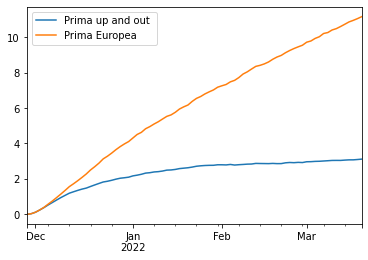

In [55]:
# Definir barrera
B = B
# Crear función indicadora
I = (sim_closes < B).cumprod(axis=0)  > 0
# Definir strike
strike = K
# Calcular la prima de una opción Europea
put = pd.DataFrame({'Prima Europea':np.exp(-r*ndays)*np.fmax(strike-sim_closes, 0)
                     .mean(axis=1)},index=dates)
# Calcular la prima de una opción barrera
putba = pd.DataFrame({'Prima up and out ':np.exp(-r*ndays)*(I * np.fmax(strike-sim_closes, 0))
                       .mean(axis=1)},index=dates)
# Graficar el resultado de las dos primas previamente valuadas
ax = putba.plot();
put.plot(ax=ax);

In [56]:
putba.iloc[-1], put.iloc[-1]

(Prima up and out     3.117723
 Name: 2022-03-18 00:00:00, dtype: float64,
 Prima Europea    11.164671
 Name: 2022-03-18 00:00:00, dtype: float64)

#### Conclusiones
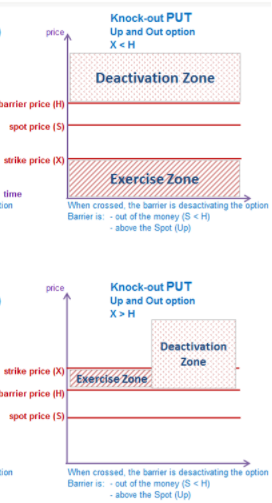
Como se está trabajando con una opción barrera 'PUT'- up-and-out se tienen las anteriores opciones para la valuación de una opción Barrera, debido a que se escogió una opcion con un spot price mayor al strike price, se toma:

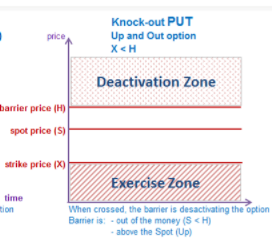
Por lo tanto el precio de la barrera debe ser mayor al spot price que se tiene: 337.91, se tomó un valor de 339 ya que personalmente me considero aversa al riesgo, si tengo un put que esta 'apostando' por qué el precio de Microsoft baje y desea que se desactive la posición en el momento en que esta suba de su precio actual, y este sube, quiero que la desactivación ocurra algo 'inmediato' si es que mi predicción se equivoca y este comienza a subir, para evitar una mayor pérdida de dinero.


Esta estrategia comparada con una opcion Europea es mas barata, por lo tanto es buena.

#### Código de solución `ESTUDIANTE 2: IVAN ARELLANO`

In [1]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from sklearn.neighbors import KernelDensity
import datetime
from datetime import datetime, timedelta
import scipy.stats as st
import scipy as sp
import scipy.optimize as optimize
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
%matplotlib inline
#algunas opciones para Python
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [2]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

####### Calculation of log-returns
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).dropna()

In [3]:
closes = get_adj_closes(['MSFT'], '2017-01-01')
closes_MSFT = closes.loc[:,'MSFT']
ret_MSFT = calc_daily_ret(closes_MSFT)
closes_MSFT,closes_MSFT[-1]

(Date
 2017-01-03     58.186
 2017-01-04     57.925
 2017-01-05     57.925
 2017-01-06     58.427
 2017-01-09     58.241
                ...   
 2021-11-18    341.270
 2021-11-19    343.110
 2021-11-22    339.830
 2021-11-23    337.680
 2021-11-24    337.910
 Name: MSFT, Length: 1234, dtype: float64,
 337.9100036621094)

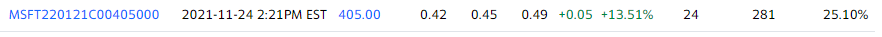

# Histograma de rendimientos 

In [4]:
mu = ret_MSFT.mean()
sigma = ret_MSFT.std()
r = 0.0021/360 # Tasa utilizada en clase
mu, sigma, r

(0.0014267178176682847, 0.01732629832479977, 5.833333333333333e-06)

In [5]:
# Centro mis datos en mi tasa libre de riesgo
freq, values = np.histogram(ret_MSFT-mu+r, bins=10000)
# freq = freq.astype('float32')
prob = freq/np.sum(freq)

In [6]:
# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = '2022-01-21'

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start=today, end=expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K = 405
S0 = closes_MSFT.iloc[-1]

ret = np.random.choice(values[1:], (ndays,nscen), p=prob)
sim_ret_hist = pd.DataFrame(ret, index=dates)
sim_closes_hist = S0*np.exp(sim_ret_hist.cumsum())
sim_closes_hist.iloc[0,:]=S0

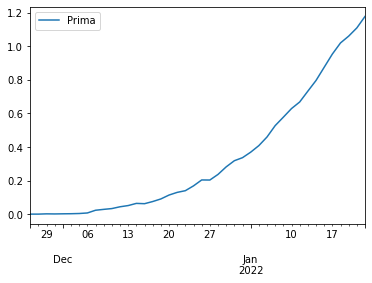

In [7]:
strike = pd.DataFrame(K*np.ones([ndays,nscen]),index=dates)
call_hist=pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(sim_closes_hist-strike,np.zeros([ndays,nscen])).T.mean()},index=dates)
call_hist.plot();

In [8]:
call_hist.iloc[-1]

Prima    1.177
Name: 2022-01-21 00:00:00, dtype: float64

#  opción barrera 'CALL'- down-and-out (Para MSFT CON STRIKE DE 405)

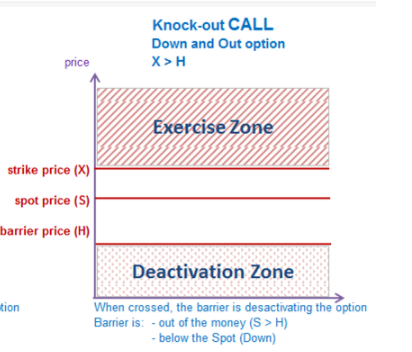

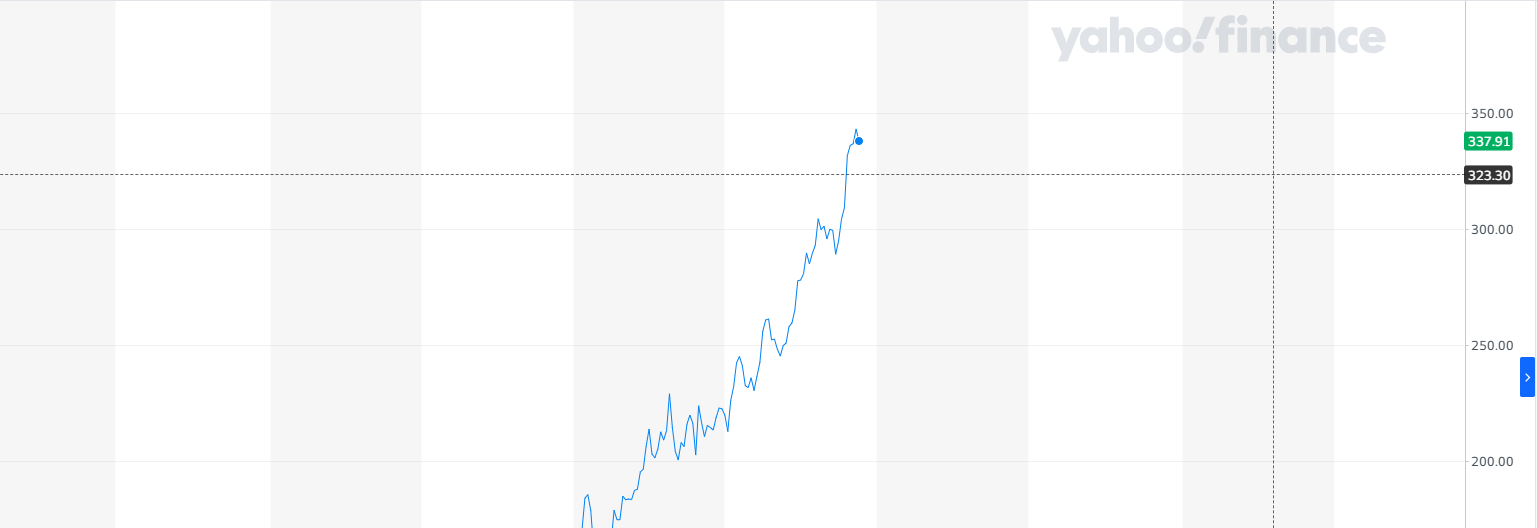

In [20]:
# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = expiry

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start = today, end = expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K = 405
S0 = closes_MSFT.iloc[-1]

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes.iloc[0,:] = S0

In [22]:
sim_closes

,0,1,2,3,4,5,6,...,9993,9994,9995,9996,9997,9998,9999
2021-11-25,337.910,337.910,337.910,337.910,337.910,337.910,337.910,...,337.910,337.910,337.910,337.910,337.910,337.910,337.910
2021-11-26,321.080,338.377,329.978,342.510,346.618,331.140,336.075,...,343.632,348.698,318.313,320.717,352.617,338.657,330.812
2021-11-29,320.745,339.351,331.457,340.967,351.183,334.865,336.526,...,337.600,353.667,314.723,334.355,356.349,340.919,323.259
2021-11-30,322.873,336.140,323.362,340.500,352.715,330.270,322.114,...,329.745,347.630,322.777,334.738,358.477,329.714,324.753
2021-12-01,315.435,340.537,333.178,338.861,350.284,320.276,328.746,...,324.673,342.393,319.030,332.573,360.971,328.500,328.771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-17,300.149,348.367,320.172,341.179,349.082,365.208,351.852,...,322.880,313.091,302.588,348.717,336.864,353.664,340.927
2022-01-18,299.063,350.370,320.281,345.753,345.631,373.146,352.039,...,319.318,310.202,300.780,343.424,337.859,358.742,336.749
2022-01-19,303.732,355.656,316.999,349.695,335.445,374.007,350.630,...,313.022,304.593,296.776,331.304,330.084,354.493,335.131
2022-01-20,303.083,358.723,310.640,350.042,338.179,374.596,341.960,...,324.218,297.416,307.407,327.910,333.446,359.846,332.767


In [32]:
pd.set_option('display.max_columns', 15)

# Precio barrera
B = 300

# Función de activación (knock-in)
# Si en algún momento el precio toca la barrera la opción se desactiva
I = (sim_closes > B).cumprod(axis=0)  > 0
I

,0,1,2,3,4,5,6,...,9993,9994,9995,9996,9997,9998,9999
2021-11-25,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True
2021-11-26,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True
2021-11-29,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True
2021-11-30,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True
2021-12-01,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-17,False,True,False,True,True,True,True,...,True,True,False,True,True,True,True
2022-01-18,False,True,False,True,True,True,True,...,True,True,False,True,True,True,True
2022-01-19,False,True,False,True,True,True,True,...,True,True,False,True,True,True,True
2022-01-20,False,True,False,True,True,True,True,...,True,False,False,True,True,True,True


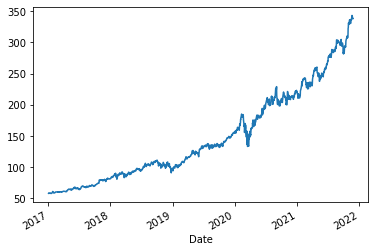

In [33]:
closes_MSFT.plot()

In [12]:
K = 405
S0 = S0
K, S0

(405, 337.9100036621094)

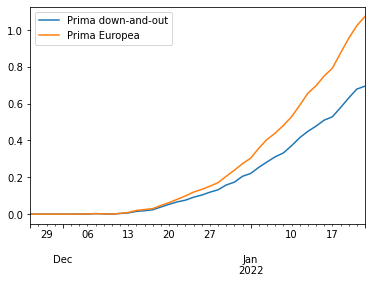

In [39]:
# Definir barrera
B = 335
# Crear función indicadora
I = (sim_closes > B).cumprod(axis=0)  > 0
# Definir strike
strike = K
# Calcular la prima de una opción Europea
call = pd.DataFrame({'Prima Europea':np.exp(-r*ndays)*np.fmax(sim_closes - strike, 0)
                     .mean(axis=1)},index=dates)
# Calcular la prima de una opción barrera
callui = pd.DataFrame({'Prima down-and-out':np.exp(-r*ndays)*(I * np.fmax(sim_closes - strike, 0))
                       .mean(axis=1)},index=dates)
# Graficar el resultado de las dos primas previamente valuadas
ax = callui.plot();
call.plot(ax=ax);

In [40]:
call.iloc[-1]

Prima Europea    1.073
Name: 2022-01-21 00:00:00, dtype: float64

Comparación vemos que si nos da una Prima menor, observando esta tendencia alicista teniendo en cuenta que si el precio llegará a tocar los 335 la opcción se va a desactivar, recordando un strike de 405 para enero del prox año 

# Put  up and out  (Strike de 295)
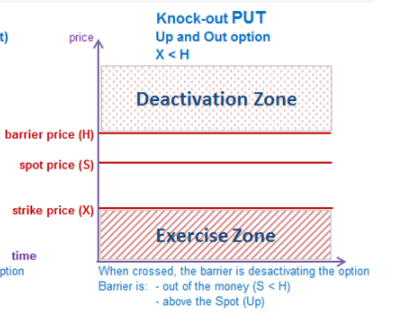

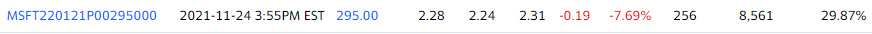

In [44]:
# Datos de la opción y del día de actual
today = pd.Timestamp(date.today())
expiry = '2022-01-21'

# Fechas desde el día de hoy hasta la fecha de cierre del contrato (considerando unicamente los días hábiles)
dates = pd.date_range(start=today, end=expiry, freq='B')

# Cantidad de escenarios a simular para el método de montecarlo
ndays = len(dates)
nscen = 10000

K = 295
S0 = closes_MSFT.iloc[-1]

ret = np.random.choice(values[1:], (ndays,nscen), p=prob)
sim_ret_hist = pd.DataFrame(ret, index=dates)
sim_closes_hist = S0*np.exp(sim_ret_hist.cumsum())
sim_closes_hist.iloc[0,:]=S0

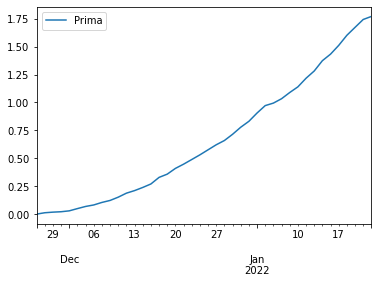

In [45]:
strike = pd.DataFrame(K*np.ones([ndays,nscen]),index=dates)
call_hist=pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike-sim_closes_hist,np.zeros([ndays,nscen])).T.mean()},index=dates)
call_hist.plot();

In [46]:
call_hist.iloc[-1]

Prima    1.77
Name: 2022-01-21 00:00:00, dtype: float64

In [48]:
pd.set_option('display.max_columns', 15)

# Precio barrera
B = 350

# Función  (Put  up and out )
# Si en algún momento el precio toca la barrera la opción se desactiva
I = (sim_closes < B).cumprod(axis=0)  > 0
I

,0,1,2,3,4,5,6,...,9993,9994,9995,9996,9997,9998,9999
2021-11-25,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True
2021-11-26,True,True,True,True,True,True,True,...,True,True,True,True,False,True,True
2021-11-29,True,True,True,True,False,True,True,...,True,False,True,True,False,True,True
2021-11-30,True,True,True,True,False,True,True,...,True,False,True,True,False,True,True
2021-12-01,True,True,True,True,False,True,True,...,True,False,True,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-17,True,False,True,False,False,False,False,...,True,False,True,False,False,False,False
2022-01-18,True,False,True,False,False,False,False,...,True,False,True,False,False,False,False
2022-01-19,True,False,True,False,False,False,False,...,True,False,True,False,False,False,False
2022-01-20,True,False,True,False,False,False,False,...,True,False,True,False,False,False,False


In [49]:
K = 295
S0 = S0
K, S0

(295, 337.9100036621094)

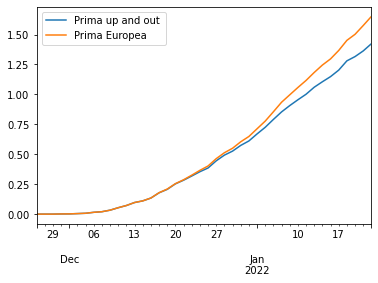

In [51]:
# Definir barrera
B = 350
# Crear función indicadora
I = (sim_closes < B).cumprod(axis=0)  > 0
# Definir strike
strike = K
# Calcular la prima de una opción Europea
call = pd.DataFrame({'Prima Europea':np.exp(-r*ndays)*np.fmax(strike-sim_closes, 0)
                     .mean(axis=1)},index=dates)
# Calcular la prima de una opción barrera
callui = pd.DataFrame({'Prima up and out ':np.exp(-r*ndays)*(I * np.fmax(strike-sim_closes, 0))
                       .mean(axis=1)},index=dates)
# Graficar el resultado de las dos primas previamente valuadas
ax = callui.plot();
call.plot(ax=ax);

In [53]:
callui.iloc[-1]

Prima up and out     1.423
Name: 2022-01-21 00:00:00, dtype: float64

Observo que tambien logramos una prima menor que la prima Europea 